In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

### 박스 플롯
1사분위와 3사분위 값으로 상자를 그린 다음 그 안에 2사분위(중간)을 표시<br>
1사분위와 3사분위 사이거리의 1.5배만큼 위아래 거리에서 각각 가장 큰 값과 가장 작은 값까지 수염을 그림

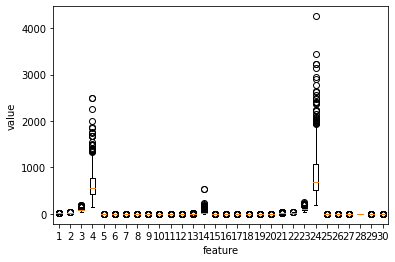

In [2]:
cancer = load_breast_cancer()
plt.boxplot(cancer.data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [3]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [4]:
np.unique(cancer.target,return_counts=True)

(array([0, 1]), array([212, 357]))

In [5]:
x = cancer.data
y = cancer.target

# 이거 대신에

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.2,random_state = 42)


In [6]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  def forpass(self,x):
    z = np.sum(x * self.w) + self.b
    return z
  def backprop(self,x,err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad,b_grad
  def activation(self,z):
    z = np.clip(z,-100,None)
    a = 1 / (1 + np.exp(-z))
    return a
  def fit(self,x,y,epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i,y_i in zip(x,y):
        z  = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad,b_grad = self.backprop(x_i,err)
        self.w -= w_grad
        self.b -= b_grad
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

In [7]:
neuron = LogisticNeuron()
neuron.fit(x_train,y_train)

In [8]:
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

In [20]:
##L1 규제와 L2 규제
class SingleLayer:
  def __init__(self,learning_rate = 0.1):
    self.w = None
    self.b = None
    #
    self.losses = []
    ##
    self.w_history = []
    ###
    self.val_losses = []
    self.lr = learning_rate
  def forpass(self,x):
    z = np.sum(x * self.w) + self.b
    return z
  def backprop(self,x,err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad,b_grad
  def activation(self,z):
    z = np.clip(z,-100,None)
    a = 1 / (1 + np.exp(-z))
    return a
  def fit(self,x,y,epochs = 100,x_val =None,y_val = None):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      #
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z  = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad,b_grad = self.backprop(x[i],err)
        ##
        self.w -= w_grad * self.lr
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a,1e-10,1-1e-10)
        loss +=  -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val,y_val)
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0
  def score(self,x,y):
    return np.mean(self.predict(x)==y)
  def update_val_loss(self,x_val,y_val):
    if x_val is None: return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a,1e-10,1-1e-10)
      val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1-a))
    self.val_losses.append(val_loss / len(y_val))

  

In [10]:
layer = SingleLayer()
layer.fit(x_train,y_train)
layer.score(x_test,y_test)

0.9210526315789473

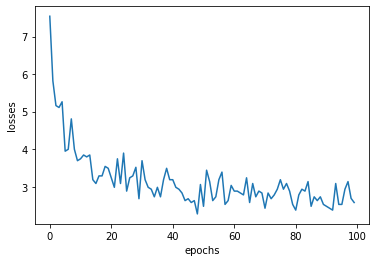

In [11]:
plt.plot(layer.losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

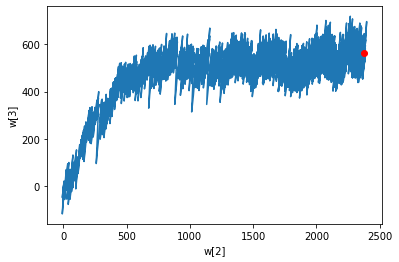

In [12]:
w2 = []
w3 = []
for w in layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel("w[2]")
plt.ylabel("w[3]")
plt.show()


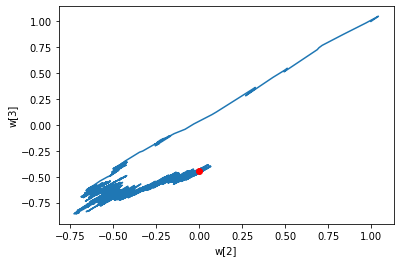

In [14]:
train_mean = np.mean(x_train,axis = 0)
train_std = np.std(x_train,axis = 0)
x_train_scaled = (x_train - train_mean) / train_std

layer2 = SingleLayer()
layer2.fit(x_train_scaled,y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel("w[2]")
plt.ylabel("w[3]")
plt.show()

In [15]:
val_mean = np.mean(x_test,axis = 0)
val_std = np.std(x_test,axis = 0)
x_val_scaled = (x_test - val_mean) / val_std
layer2.score(x_val_scaled,y_test)

0.9736842105263158

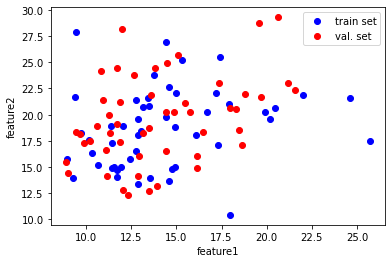

In [16]:
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_test[:50,0],x_test[:50,1],'ro')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend(["train set","val. set"])
plt.show(
)

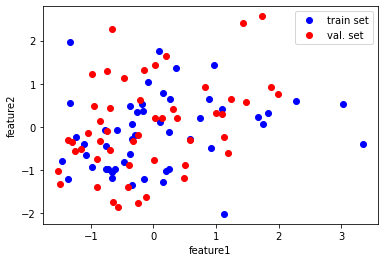

In [17]:
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend(["train set","val. set"])
plt.show(
)

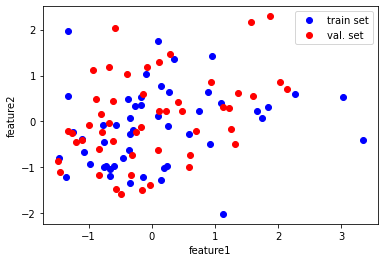

In [18]:
x_val_scaled = (x_test - train_mean) / train_std
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend(["train set","val. set"])
plt.show(
)

In [19]:
layer2.score(x_val_scaled,y_test)

0.9649122807017544

In [24]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled,y_train,x_val = x_val_scaled,y_val = y_test)

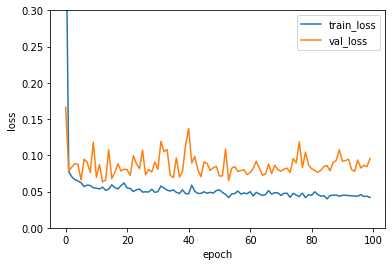

In [25]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train_loss","val_loss"])
plt.show()

In [29]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled,y_train,x_val = x_val_scaled,y_val = y_test,epochs = 20)
layer4.score(x_val_scaled,y_test)

0.9649122807017544